In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
MI_idx = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/MI_idx.csv", index_col = None)
MI_idx = pd.DataFrame(MI_idx)
MI_idx = MI_idx.drop(["common"], axis = 1) # drop common
MI_idx = MI_idx.drop(["politics"], axis = 1) # drop politics
MI_idx

,condition,mental illness,difficulty changing,desired change,genes,punishment,control,wrongness,internal distress
0,pedophile,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0
1,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pedophile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12215,schizophrenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12216,schizophrenia,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0
12217,schizophrenia,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0
12218,schizophrenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### "wide_nopol" WITH n column

In [115]:
def standard_error(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

In [116]:
def count_non_na(x):
    return x.notna().sum()

In [117]:
# create a wide dataset
wide_nopol = pd.pivot_table(MI_idx, 
                          index='condition', 
                          values=MI_idx.columns[1:9], 
                          aggfunc=('mean', 'std', standard_error, count_non_na))

In [118]:
# put "n" to the left of "mean"
columns_order = []
for col in wide_nopol.columns.levels[0]:
    if col == 'count_non_na':
        columns_order.insert(0, ('count_non_na', ''))
    else:
        columns_order.append(col)

wide_nopol = wide_nopol[columns_order]

In [119]:
# rename
wide_nopol = wide_nopol.rename(columns={'count_non_na': 'n'}) # rename "count_non_na" to "n"
wide_nopol = wide_nopol.rename(columns={'mean': 'M'}) # rename "mean" to "M"
wide_nopol = wide_nopol.rename(columns={'standard_error': 'SE'}) # rename "standard_error" to "SE"
wide_nopol = wide_nopol.rename(columns={'std': 'SD'}) # rename "std" to "SD"
wide_nopol

control                               desired change            \
                    n         M        SE        SD              n         M   
condition                                                                      
depression        481  3.093555  0.043790  1.530788            481  5.885655   
drugs             482  3.601660  0.048199  1.684908            482  4.769710   
fetish            359  3.401114  0.048055  1.679851            359  3.571031   
gay               483  2.360248  0.049776  1.740008            483  2.652174   
obese             639  5.021909  0.037897  1.324766            639  5.416275   
pedophile         482  3.732365  0.054165  1.893459            482  4.091286   
psychopath        483  2.635611  0.045991  1.607727            483  3.020704   
racist            486  5.718107  0.041412  1.447629            486  2.600823   
schizophrenia     481  2.122661  0.040703  1.422851            481  5.902287   
transgender       512  3.039062  0.058339  2.039348            512  4.289062   

                                  difficulty changing            ...  \
                     SE        SD                   n         M  ...   
condition                                                        ...   
depression     0.038661  1.351474                 481  5.006237  ...   
drugs          0.042615  1.489700                 482  5.614108  ...   
fetish         0.043556  1.522585                 359  5.077994  ...   
gay            0.042970  1.502118                 483  6.250518  ...   
obese          0.039384  1.376738                 639  4.766823  ...   
pedophile      0.048419  1.692581                 482  5.734440  ...   
psychopath     0.048435  1.693160                 483  6.157350  ...   
racist         0.041456  1.449180                 486  4.895062  ...   
schizophrenia  0.038255  1.337292                 481  5.918919  ...   
transgender    0.055871  1.953079                 512  5.787109  ...   

              mental illness           punishment                      \
                          SE        SD          n         M        SE   
condition                                                               
depression          0.044092  1.541317        481  3.821206  0.027095   
drugs               0.052626  1.839654        482  4.454357  0.032569   
fetish              0.053313  1.863676        359  4.130919  0.022872   
gay                 0.043848  1.532786        483  4.045549  0.017530   
obese               0.043957  1.536605        639  4.018779  0.018394   
pedophile           0.048520  1.696125        482  5.408714  0.038395   
psychopath          0.043758  1.529647        483  4.784679  0.035436   
racist              0.050518  1.765960        486  5.115226  0.035610   
schizophrenia       0.030825  1.077546        481  3.118503  0.038695   
transgender         0.060024  2.098261        512  4.078125  0.019559   

                        wrongness                                
                     SD         n         M        SE        SD  
condition                                                        
depression     0.947171       481  2.831601  0.054204  1.894817  
drugs          1.138529       482  4.852697  0.051493  1.800059  
fetish         0.799523       359  3.462396  0.059008  2.062733  
gay            0.612792       483  2.356108  0.057313  2.003498  
obese          0.642993       639  3.809077  0.052766  1.844549  
pedophile      1.342170       482  6.603734  0.031556  1.103117  
psychopath     1.238731       483  5.565217  0.047065  1.645247  
racist         1.244822       486  6.236626  0.038834  1.357521  
schizophrenia  1.352656       481  3.343035  0.060913  2.129358  
transgender    0.683715       512  2.894531  0.060694  2.121691  

[10 rows x 32 columns]

In [30]:
## Saved as "wide_nopol_mean.csv"
# wide_nopol.to_csv("wide_nopol.csv") 

### "wide_nopol" WITHOUT n column

In [120]:
wide_nopol = pd.pivot_table(MI_idx, 
                          index='condition', 
                          values=MI_idx.columns[1:9], 
                          aggfunc=('mean', 'std', standard_error))

In [121]:
# rename
wide_nopol = wide_nopol.rename(columns={'mean': 'M'}) # rename "mean" to "M"
wide_nopol = wide_nopol.rename(columns={'standard_error': 'SE'}) # rename "standard_error" to "SE"
wide_nopol = wide_nopol.rename(columns={'std': 'SD'}) # rename "std" to "SD"
wide_nopol

control                     desired change            \
                      M        SE        SD              M        SE   
condition                                                              
depression     3.093555  0.043790  1.530788       5.885655  0.038661   
drugs          3.601660  0.048199  1.684908       4.769710  0.042615   
fetish         3.401114  0.048055  1.679851       3.571031  0.043556   
gay            2.360248  0.049776  1.740008       2.652174  0.042970   
obese          5.021909  0.037897  1.324766       5.416275  0.039384   
pedophile      3.732365  0.054165  1.893459       4.091286  0.048419   
psychopath     2.635611  0.045991  1.607727       3.020704  0.048435   
racist         5.718107  0.041412  1.447629       2.600823  0.041456   
schizophrenia  2.122661  0.040703  1.422851       5.902287  0.038255   
transgender    3.039062  0.058339  2.039348       4.289062  0.055871   

                        difficulty changing                         genes  \
                     SD                   M        SE        SD         M   
condition                                                                   
depression     1.351474            5.006237  0.038667  1.351682  4.043659   
drugs          1.489700            5.614108  0.033717  1.178660  3.265560   
fetish         1.522585            5.077994  0.042112  1.472102  2.983287   
gay            1.502118            6.250518  0.037282  1.303273  4.182195   
obese          1.376738            4.766823  0.041770  1.460159  3.948357   
pedophile      1.692581            5.734440  0.040456  1.414220  2.991701   
psychopath     1.693160            6.157350  0.033979  1.187802  4.331263   
racist         1.449180            4.895062  0.042996  1.503020  2.002058   
schizophrenia  1.337292            5.918919  0.035659  1.246527  4.929314   
transgender    1.953079            5.787109  0.042611  1.489556  3.970703   

               ... internal distress mental illness                      \
               ...                SD              M        SE        SD   
condition      ...                                                        
depression     ...          1.149942       4.563410  0.044092  1.541317   
drugs          ...          1.361333       3.674274  0.052626  1.839654   
fetish         ...          1.580088       3.250696  0.053313  1.863676   
gay            ...          1.634610       1.859213  0.043848  1.532786   
obese          ...          1.229876       2.165884  0.043957  1.536605   
pedophile      ...          1.689373       5.618257  0.048520  1.696125   
psychopath     ...          1.879390       5.877847  0.043758  1.529647   
racist         ...          1.789031       2.578189  0.050518  1.765960   
schizophrenia  ...          1.167284       6.363825  0.030825  1.077546   
transgender    ...          1.467808       2.951172  0.060024  2.098261   

              punishment                     wrongness                      
                       M        SE        SD         M        SE        SD  
condition                                                                   
depression      3.821206  0.027095  0.947171  2.831601  0.054204  1.894817  
drugs           4.454357  0.032569  1.138529  4.852697  0.051493  1.800059  
fetish          4.130919  0.022872  0.799523  3.462396  0.059008  2.062733  
gay             4.045549  0.017530  0.612792  2.356108  0.057313  2.003498  
obese           4.018779  0.018394  0.642993  3.809077  0.052766  1.844549  
pedophile       5.408714  0.038395  1.342170  6.603734  0.031556  1.103117  
psychopath      4.784679  0.035436  1.238731  5.565217  0.047065  1.645247  
racist          5.115226  0.035610  1.244822  6.236626  0.038834  1.357521  
schizophrenia   3.118503  0.038695  1.352656  3.343035  0.060913  2.129358  
transgender     4.078125  0.019559  0.683715  2.894531  0.060694  2.121691  

[10 rows x 24 columns]

### Create descriptive stats table

In [35]:
# nopol = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/nopol.csv", index_col = None)
# nopol = pd.DataFrame(nopol)
# nopol

In [112]:
def count_non_na(x): # defined above but just putting here for reference
    return x.notna().sum()

- Count non-NA values in original *`MI_idx`* dataset
- Make a dictionary w/ those values

In [211]:
n_values = MI_idx.groupby('condition').agg(count_non_na).iloc[:, 0].to_dict()
n_values

{'depression': 481,
 'drugs': 482,
 'fetish': 359,
 'gay': 483,
 'obese': 639,
 'pedophile': 482,
 'psychopath': 483,
 'racist': 486,
 'schizophrenia': 481,
 'transgender': 512}

In [233]:
# n_df = pd.DataFrame(n_values, index=["n"])
# # n_df.to_csv("n_df.csv")
# n_df = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/n_df.csv")
# n_df

n_df = pd.DataFrame.from_dict(n_values, orient='index')
c_name = ["n"]
n_df.columns = c_name
n_df.index.name = "condition"

# n_df.to_csv("n_df_long.csv")

n_df = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/n_df_long.csv", index_col=[0])
n_df = n_df.T
n_df = n_df.style.set_properties(**{'text-align': 'center'})
n_df

condition,depression,drugs,fetish,gay,obese,pedophile,psychopath,racist,schizophrenia,transgender
n,481,482,359,483,639,482,483,486,481,512


In [125]:
wide_nopol = pd.merge(n_df, wide_nopol, on=index)
wide_nopol = wide_nopol.set_index("n", append=True)
wide_nopol

,,"(control, M)","(control, SE)","(control, SD)","(desired change, M)","(desired change, SE)","(desired change, SD)","(difficulty changing, M)","(difficulty changing, SE)","(difficulty changing, SD)","(genes, M)",...,"(internal distress, SD)","(mental illness, M)","(mental illness, SE)","(mental illness, SD)","(punishment, M)","(punishment, SE)","(punishment, SD)","(wrongness, M)","(wrongness, SE)","(wrongness, SD)"
condition,n,,,,,,,,,,,,,,,,,,,,,
depression,481,3.093555,0.043790,1.530788,5.885655,0.038661,1.351474,5.006237,0.038667,1.351682,4.043659,...,1.149942,4.563410,0.044092,1.541317,3.821206,0.027095,0.947171,2.831601,0.054204,1.894817
drugs,482,3.601660,0.048199,1.684908,4.769710,0.042615,1.489700,5.614108,0.033717,1.178660,3.265560,...,1.361333,3.674274,0.052626,1.839654,4.454357,0.032569,1.138529,4.852697,0.051493,1.800059
fetish,359,3.401114,0.048055,1.679851,3.571031,0.043556,1.522585,5.077994,0.042112,1.472102,2.983287,...,1.580088,3.250696,0.053313,1.863676,4.130919,0.022872,0.799523,3.462396,0.059008,2.062733
gay,483,2.360248,0.049776,1.740008,2.652174,0.042970,1.502118,6.250518,0.037282,1.303273,4.182195,...,1.634610,1.859213,0.043848,1.532786,4.045549,0.017530,0.612792,2.356108,0.057313,2.003498
obese,639,5.021909,0.037897,1.324766,5.416275,0.039384,1.376738,4.766823,0.041770,1.460159,3.948357,...,1.229876,2.165884,0.043957,1.536605,4.018779,0.018394,0.642993,3.809077,0.052766,1.844549
pedophile,482,3.732365,0.054165,1.893459,4.091286,0.048419,1.692581,5.734440,0.040456,1.414220,2.991701,...,1.689373,5.618257,0.048520,1.696125,5.408714,0.038395,1.342170,6.603734,0.031556,1.103117
psychopath,483,2.635611,0.045991,1.607727,3.020704,0.048435,1.693160,6.157350,0.033979,1.187802,4.331263,...,1.879390,5.877847,0.043758,1.529647,4.784679,0.035436,1.238731,5.565217,0.047065,1.645247
racist,486,5.718107,0.041412,1.447629,2.600823,0.041456,1.449180,4.895062,0.042996,1.503020,2.002058,...,1.789031,2.578189,0.050518,1.765960,5.115226,0.035610,1.244822,6.236626,0.038834,1.357521
schizophrenia,481,2.122661,0.040703,1.422851,5.902287,0.038255,1.337292,5.918919,0.035659,1.246527,4.929314,...,1.167284,6.363825,0.030825,1.077546,3.118503,0.038695,1.352656,3.343035,0.060913,2.129358


In [190]:
# wide_nopol.to_csv("wide_nopol_new.csv") 

In [202]:
wide_nopol = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/wide_nopol_new.csv", index_col=[0, 1], header=[0, 1])
wide_nopol

control                     desired change            \
                          M        SE        SD              M        SE   
condition     n                                                            
depression    481  3.093555  0.043790  1.530788       5.885655  0.038661   
drugs         482  3.601660  0.048199  1.684908       4.769710  0.042615   
fetish        359  3.401114  0.048055  1.679851       3.571031  0.043556   
gay           483  2.360248  0.049776  1.740008       2.652174  0.042970   
obese         639  5.021909  0.037897  1.324766       5.416275  0.039384   
pedophile     482  3.732365  0.054165  1.893459       4.091286  0.048419   
psychopath    483  2.635611  0.045991  1.607727       3.020704  0.048435   
racist        486  5.718107  0.041412  1.447629       2.600823  0.041456   
schizophrenia 481  2.122661  0.040703  1.422851       5.902287  0.038255   
transgender   512  3.039062  0.058339  2.039348       4.289062  0.055871   

                            difficulty changing           difficulty changin  \
                         SD                   M        SE                 SD   
condition     n                                                                
depression    481  1.351474            5.006237  0.038667           1.351682   
drugs         482  1.489700            5.614108  0.033717           1.178660   
fetish        359  1.522585            5.077994  0.042112           1.472102   
gay           483  1.502118            6.250518  0.037282           1.303273   
obese         639  1.376738            4.766823  0.041770           1.460159   
pedophile     482  1.692581            5.734440  0.040456           1.414220   
psychopath    483  1.693160            6.157350  0.033979           1.187802   
racist        486  1.449180            4.895062  0.042996           1.503020   
schizophrenia 481  1.337292            5.918919  0.035659           1.246527   
transgender   512  1.953079            5.787109  0.042611           1.489556   

                      genes  ... internal distress mental illness            \
                          M  ...                SD              M        SE   
condition     n              ...                                              
depression    481  4.043659  ...          1.149942       4.563410  0.044092   
drugs         482  3.265560  ...          1.361333       3.674274  0.052626   
fetish        359  2.983287  ...          1.580088       3.250696  0.053313   
gay           483  4.182195  ...          1.634610       1.859213  0.043848   
obese         639  3.948357  ...          1.229876       2.165884  0.043957   
pedophile     482  2.991701  ...          1.689373       5.618257  0.048520   
psychopath    483  4.331263  ...          1.879390       5.877847  0.043758   
racist        486  2.002058  ...          1.789031       2.578189  0.050518   
schizophrenia 481  4.929314  ...          1.167284       6.363825  0.030825   
transgender   512  3.970703  ...          1.467808       2.951172  0.060024   

                            punishment                     wrongness  \
                         SD          M        SE        SD         M   
condition     n                                                        
depression    481  1.541317   3.821206  0.027095  0.947171  2.831601   
drugs         482  1.839654   4.454357  0.032569  1.138529  4.852697   
fetish        359  1.863676   4.130919  0.022872  0.799523  3.462396   
gay           483  1.532786   4.045549  0.017530  0.612792  2.356108   
obese         639  1.536605   4.018779  0.018394  0.642993  3.809077   
pedophile     482  1.696125   5.408714  0.038395  1.342170  6.603734   
psychopath    483  1.529647   4.784679  0.035436  1.238731  5.565217   
racist        486  1.765960   5.115226  0.035610  1.244822  6.236626   
schizophrenia 481  1.077546   3.118503  0.038695  1.352656  3.343035   
transgender   512  2.098261   4.078125  0.019559  0.683715  2.894531   

                         

#### format_cell function:

Custom helper function to format the numerical values in the table cells based on their corresponding field (e.g. 'n', 'mean', etc.)

- *`value`* = numerical value that needs to be formatted
- *`field`* = string indicating the type of value being formatted (e.g. 'n', 'mean', etc.)

The function uses conditional statements to determine how to format the value vased on the field:

1. If the field is 'n', the function returns a formatted string in the format "n = {int(value)}". This will display the n value in the table as "n = ..." where "..." is the integer value of n. The *`int()`* function is used to convert the value to an integer, in case it's provided as a float.

2. If the field is 'M', 'SD', or 'SE', the function returns a formatted string with the value rounded to 2 decimal places using *`'{value:.2f}'`*. This keeps the decimal values consistent and easier to read in the table.

3. If the field does not match any of the above cases, the function returns an empty string. This is a fallback condition to handle any unexpected input and ensures that the table does not display any unwanted values.

In [131]:
def format_cell(value, field):
    if field == 'n':
        return f'n = {int(value)}'
    elif field in ['M', 'SD', 'SE']:
        return f'{value:.2f}'
    else:
        return ''

ValueError: Unknown format code 'f' for object of type 'str'

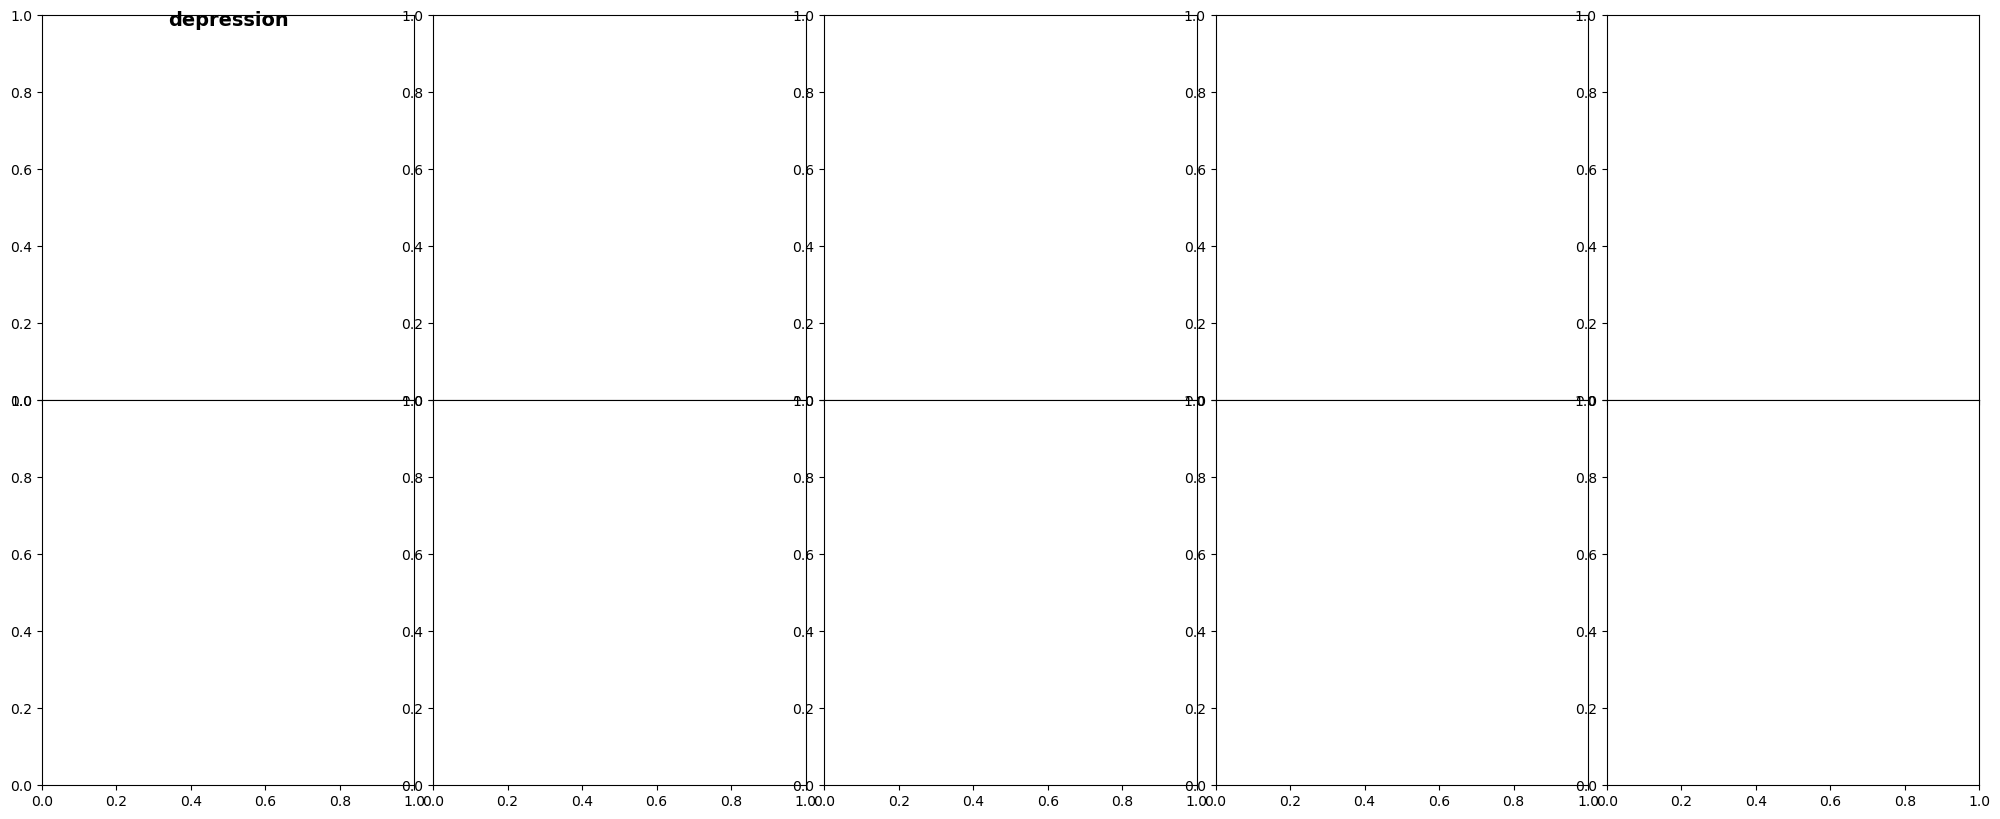

In [196]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10), sharex=True)
plt.subplots_adjust(hspace=0, wspace=0.05)

for idx, condition in enumerate(wide_nopol.index.get_level_values('condition').unique()):
    row = idx // 5
    col = idx % 5
    ax[row, col].set_title(condition, fontsize=14, fontweight='bold', y=0.95)
    
    cell_text = []
    columns = ['M', 'SD', 'SE']
    
    for control_condition in wide_nopol.columns.get_level_values(0).unique():
        values = wide_nopol.loc[condition].loc[:, control_condition]
        formatted_values = [format_cell(value, field) for value, field in zip(values, columns)]
        cell_text.append(formatted_values)
    
#     row_labels = wide_nopol.columns.get_level_values(0).unique() if col == 0 else ["" for _ in wide_nopol.columns.get_level_values(0).unique()]
#     table = ax[row, col].table(cellText=cell_text, colLabels=columns, rowLabels=row_labels, loc='center')
#     table.auto_set_font_size(False)
#     table.set_fontsize(12)
#     table.scale(1, 1.5)
#     ax[row, col].axis('off')

plt.show()

KeyError: 0

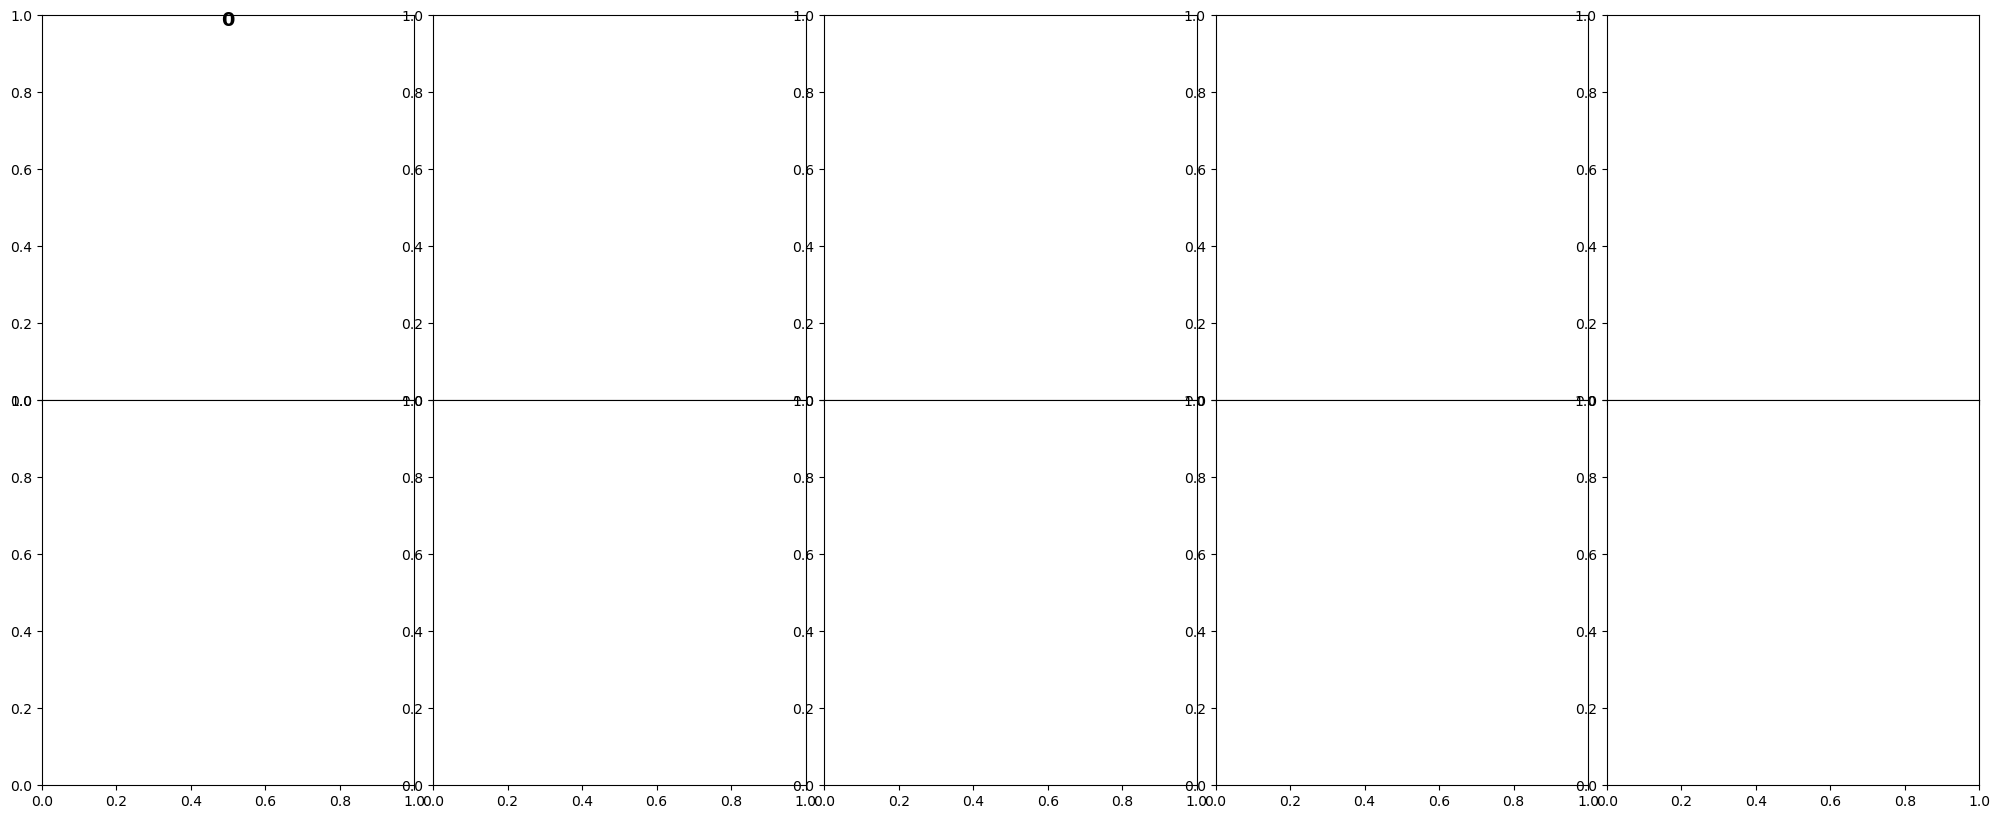

In [12]:
def format_cell(value, field):
    if field == 'M' or field == 'SD' or field == 'SE':
        return f'{value:.2f}'
    else:
        return ''

fig, ax = plt.subplots(2, 5, figsize=(25, 10), sharex=True)
plt.subplots_adjust(hspace=0, wspace=0.05)

for idx, condition in enumerate(nopol.index):
    row = idx // 5
    col = idx % 5
    ax[row, col].set_title(condition, fontsize=14, fontweight='bold', y=0.95)
    n_value = n_values[condition]
    ax[row, col].text(0.5, 0.9, f'n = {n_value}', horizontalalignment='center', fontsize=12, transform=ax[row, col].transAxes)

    cell_text = []
    columns = ['M', 'SD', 'SE']

    for control_condition in MI_idx.columns[1:9]:
        values = nopol.loc[condition, control_condition]
        formatted_values = [format_cell(value, field) for value, field in zip(values, columns)]
        cell_text.append(formatted_values)

    row_labels = MI_idx.columns[1:9] if col == 0 else ["" for _ in MI_idx.columns[1:9]]
    table = ax[row, col].table(cellText=cell_text, colLabels=columns, rowLabels=row_labels, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    ax[row, col].axis('off')

plt.show()

NameError: name 'wide_nopol' is not defined

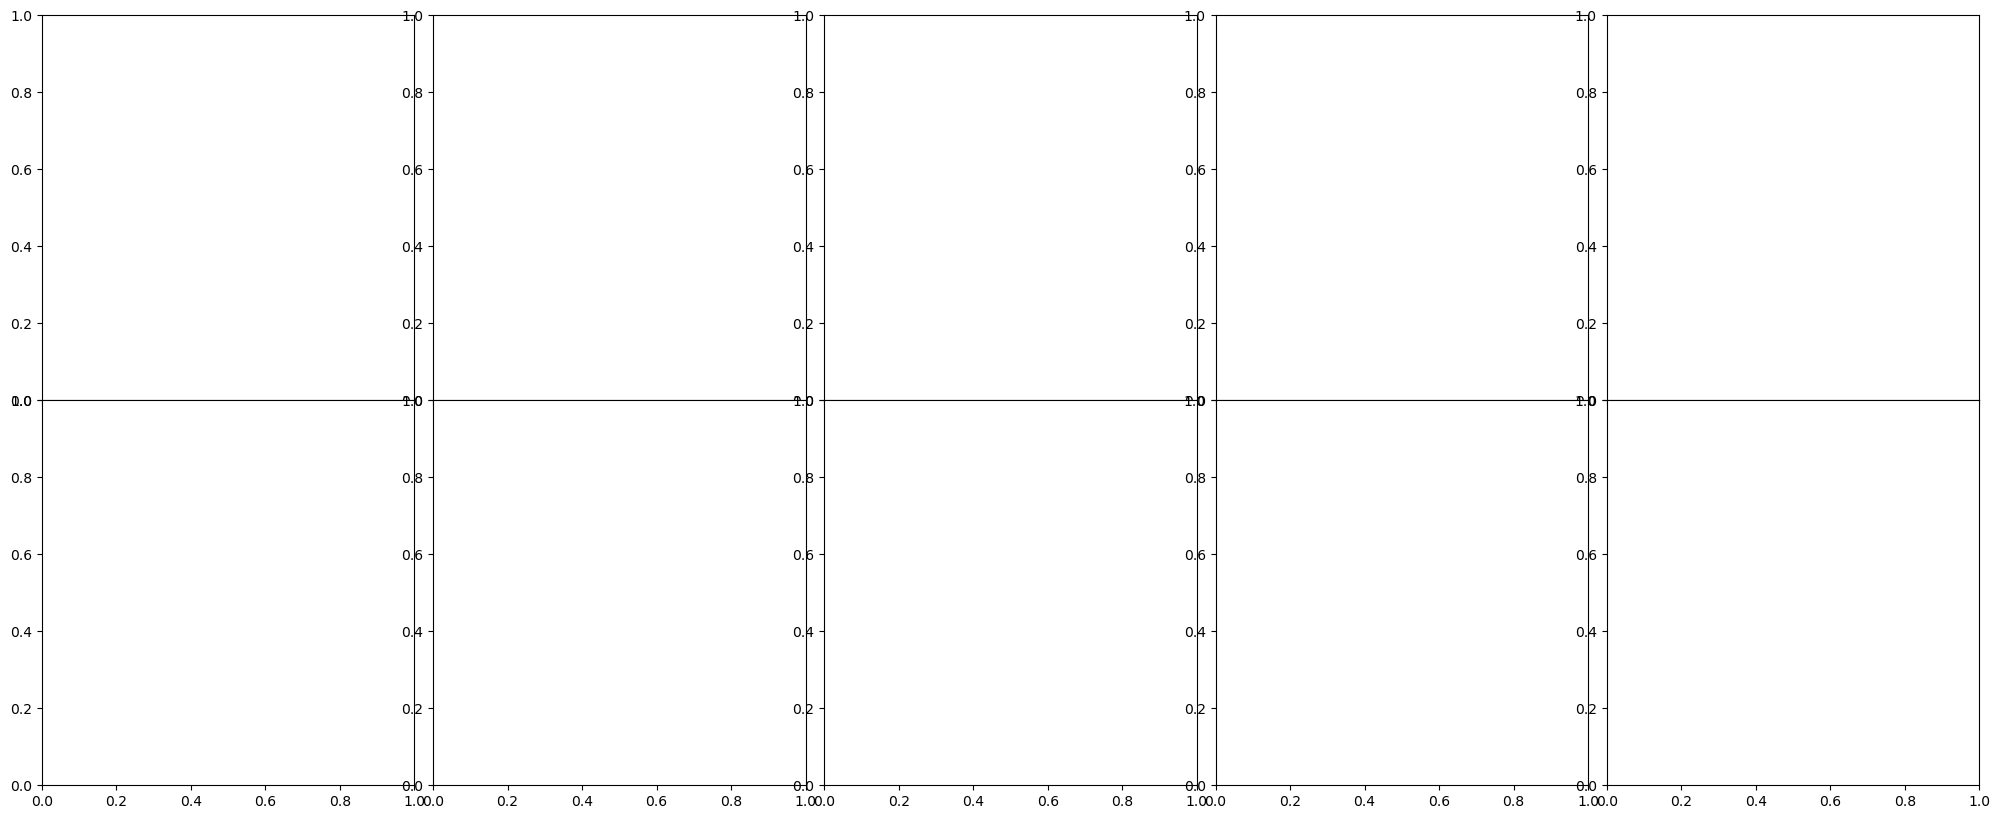

In [13]:
def format_cell(value, field):
    if field == 'M' or field == 'SD' or field == 'SE':
        return f'{value:.2f}'
    else:
        return ''

fig, ax = plt.subplots(2, 5, figsize=(25, 10), sharex=True)
plt.subplots_adjust(hspace=0, wspace=0.05)

for idx, condition in enumerate(wide_nopol.index):
    row = idx // 5
    col = idx % 5
    ax[row, col].set_title(condition, fontsize=14, fontweight='bold', y=0.95)

    cell_text = []
    columns = ['M', 'SD', 'SE']

    for control_condition in MI_idx.columns[1:9]:
        values = wide_nopol.loc[condition, control_condition]
        formatted_values = [format_cell(value, field) for value, field in zip(values, columns)]
        cell_text.append(formatted_values)

    row_labels = MI_idx.columns[1:9] if col == 0 else ["" for _ in MI_idx.columns[1:9]]
    table = ax[row, col].table(cellText=cell_text, colLabels=columns, rowLabels=row_labels, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    
    # Make control condition text bold and remove cell lines
    for i, cell in table._cells.items():
        if i[1] == 0 and col == 0:
            cell.set_text_props(fontweight='bold')
            cell.set_edgecolor('white')
        elif i[1] == 0:
            cell.set_edgecolor('white')

    ax[row, col].axis('off')

plt.show()